----

<div style="text-align: center; font-family: Arial, sans-serif; margin-top: 20px;">
    <h2 style="margin-bottom: 0;">Complex systems</h2>
    <h3 style="margin-bottom: 0;">Zipf Law</h3>
    <h4 style="margin-top: 5px; margin-bottom: 0;">Author: Damian Pietron</h4>
    <h5 style="margin-top: 5px;">Last modified: 17/10/2024 (DD;MM;YYYY)</h5>
</div>

---

# Zipf's law

Zipf's law is a phenomenon that states that, given a set of occurrences ordered in decreasing order, the value of the n-th element is inversely proportional to its frequency of occurrence.

The mathematical representation of Zipf's law can be written as:

    f(n) ∝ 1/n

where:

- `f(n)` is the frequency of the n-th element,
- `n` is the rank of the element.

In full form, Zipf's law is often written as:

---

## Code overview 

Code for this lab was written both in Python and C++, Algorithmic part was done with C++, but plots were done with Python 

In [186]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In order to download all neccesarry python libraries run command above (first remember to create virtual environment)

---

## Import libaries 

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

---

In [188]:
# load all csv 
path = Path('data')
files = path.glob('*.csv')

In [189]:
# Load the data
data_frames = {}
for file in files:
    file_name = file.name.replace('.csv', '')
    print(file_name)
    data = pd.read_csv(file)
    data_frames[file_name] = data

bible
divine_comedy
faust_de
LLM_de
plato
_1984


---

## All books with log to log comparison

<Figure size 400x100 with 0 Axes>

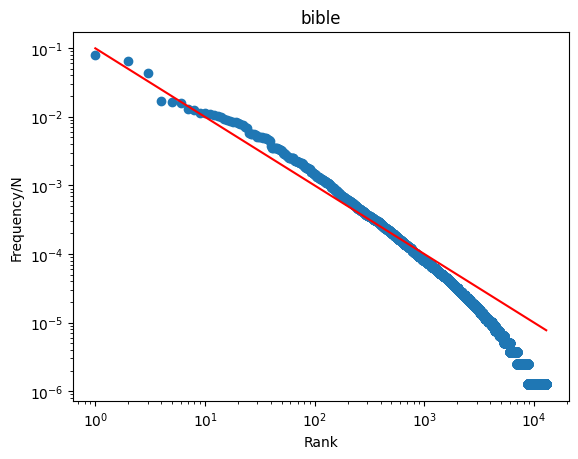

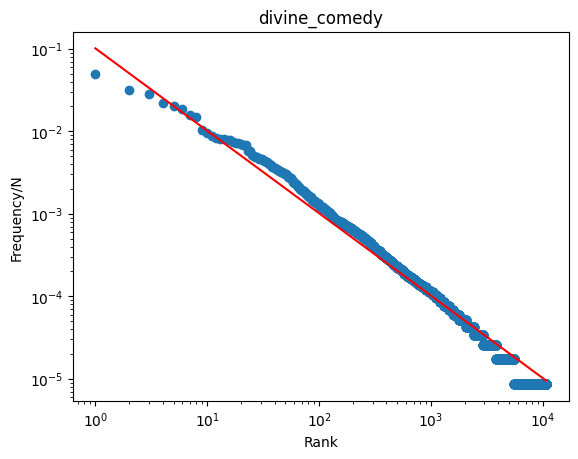

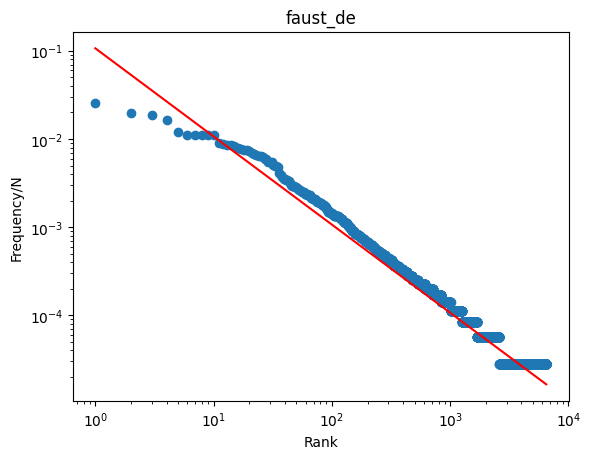

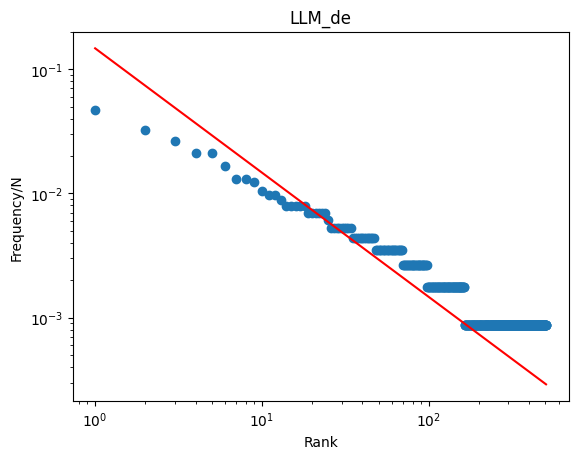

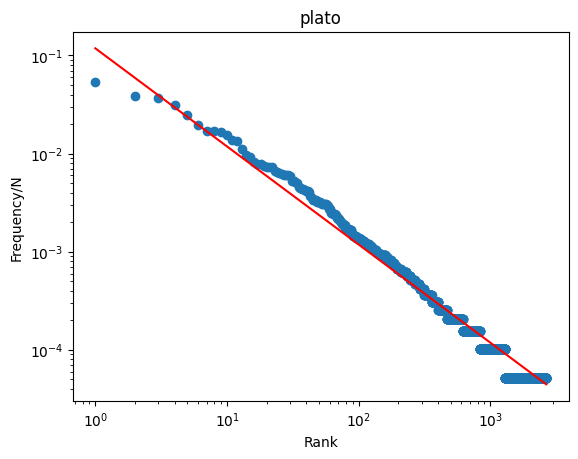

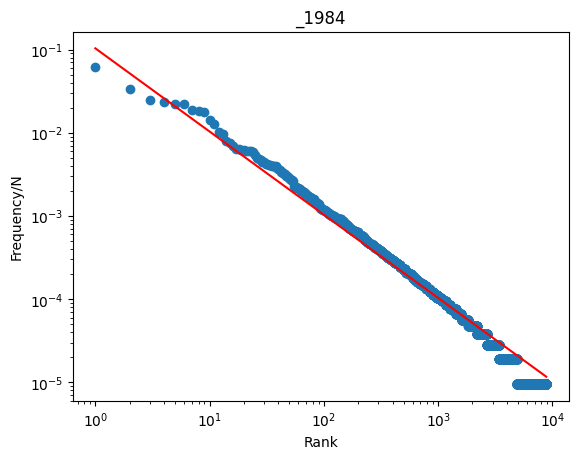

In [190]:
fig = plt.figure(figsize=(4, 1))
for book_name, book in zip(data_frames.keys(), data_frames.values()):
    plt.figure() 
    truncated_data = data_frames[book_name]
    plt.scatter(truncated_data['Rank'], truncated_data['Frequency/N'], marker='o', label=book)
    plt.plot(truncated_data['Rank'], truncated_data['Zipf'], label='Zipf', color='red')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Rank')
    plt.ylabel('Frequency/N')
    plt.title(book_name)
    plt.show()

---

## All books with linear comparison

<Figure size 400x100 with 0 Axes>

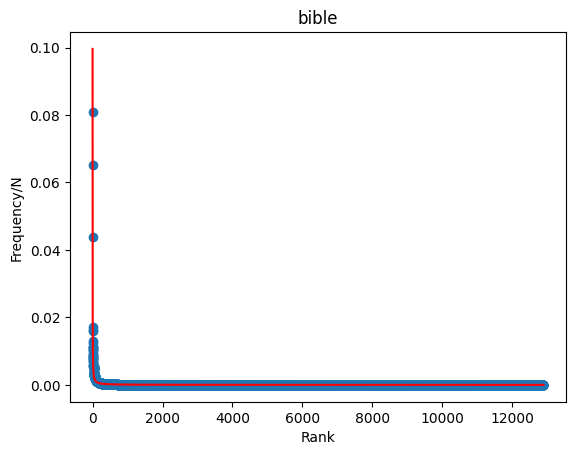

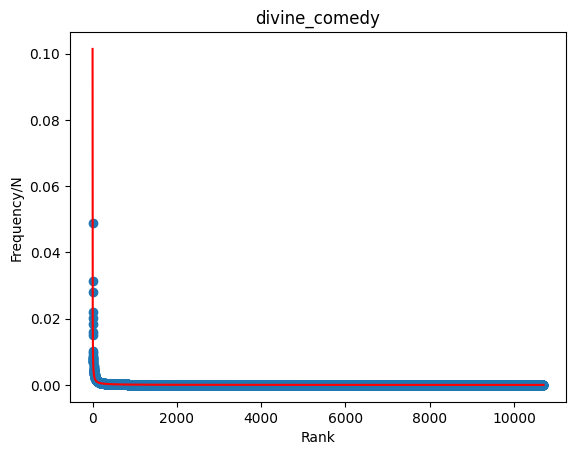

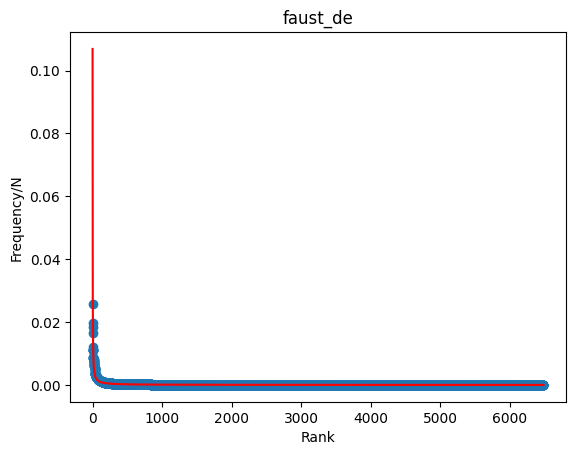

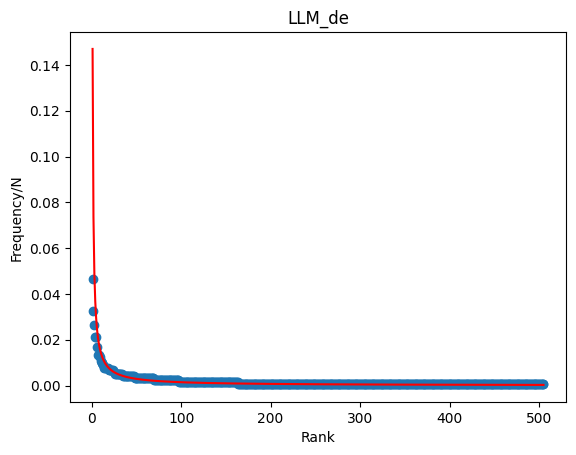

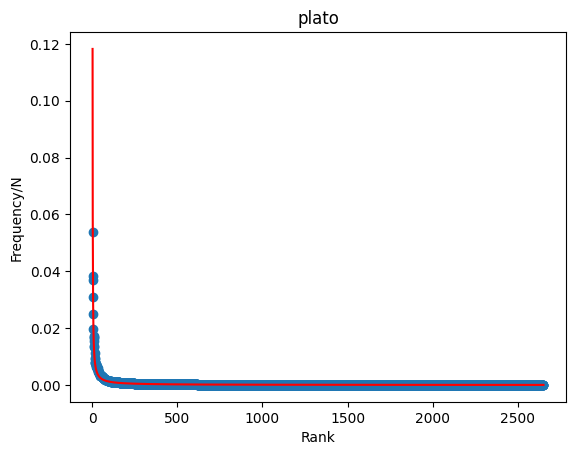

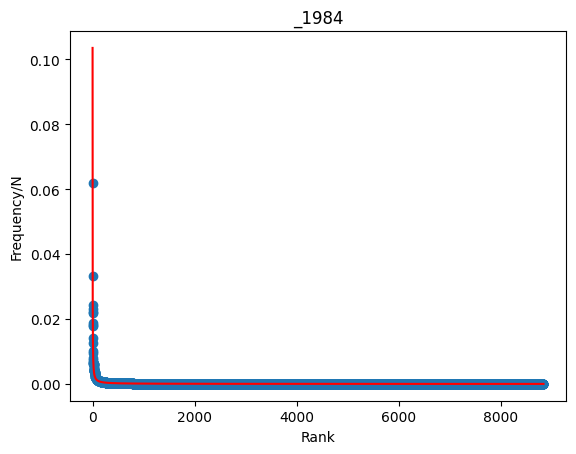

In [191]:
fig = plt.figure(figsize=(4, 1))
for book_name, book in zip(data_frames.keys(), data_frames.values()):
    plt.figure() 
    truncated_data = data_frames[book_name]
    plt.scatter(truncated_data['Rank'], truncated_data['Frequency/N'], marker='o', label=book)
    plt.plot(truncated_data['Rank'], truncated_data['Zipf'], label='Zipf', color='red')
    plt.xlabel('Rank')
    plt.ylabel('Frequency/N')
    plt.title(book_name)
    plt.show()

---

When comparing data on a linear scale, subtle changes are often difficult to observe, which become more apparent when viewed on a log-log scale. This is because **ranks increase exponentially**, typically by a factor of *10e4*. Since Zipf's Law involves the inverse of ranks, it also spans a similarly large range. In a log-log scale, this wide range is compressed and more manageable, making patterns and relationships easier to detect, whereas on a linear scale, the data can be too spread out to reveal these insights effectively.

---

## Extra 1

In [192]:
path = Path('data_fitted')
files = path.glob('*.csv')

In [193]:
data_frames = {}
for file in files:
    file_name = file.name.replace('.csv', '')
    print(file_name)
    data = pd.read_csv(file)
    data_frames[file_name] = data
    print(data.head(2))

bibleFitted
  Token  Frequency  Rank  Frequency/N      Zipf  FittedZipf    A    B
0   the      64193     1     0.080766  0.099588    0.082163  0.9  0.6
1   and      51763     2     0.065127  0.049794    0.053077  0.9  0.6
divine_comedyFitted
  Token  Frequency  Rank  Frequency/N      Zipf  FittedZipf  A  B
0   the       5721     1     0.048968  0.101467    0.050733  1  1
1     d       3655     2     0.031284  0.050733    0.033822  1  1
faust_deFitted
  Token  Frequency  Rank  Frequency/N      Zipf  FittedZipf    A    B
0   und        917     1     0.025841  0.106898    0.022068  0.9  6.4
1   ich        700     2     0.019726  0.053449    0.019689  0.9  6.4
LLM_deFitted
  Token  Frequency  Rank  Frequency/N      Zipf  FittedZipf  A    B
0   die         53     1     0.046491  0.146999    0.044545  1  2.3
1   der         37     2     0.032456  0.073499    0.034186  1  2.3
platoFitted
  Token  Frequency  Rank  Frequency/N      Zipf  FittedZipf    A    B
0   the       1047     1     0.05399

In [ ]:
fig = plt.figure(figsize=(4, 1))
for book_name, book in zip(data_frames.keys(), data_frames.values()):
    truncated_data = data_frames[book_name]
    plt.figure() 
    plt.scatter(truncated_data['Rank'], truncated_data['Frequency/N'], marker='o', label=book)
    plt.plot(truncated_data['Rank'], truncated_data['FittedZipf'], label='FittedZipf', color='red')
    plt.plot(truncated_data['Rank'], truncated_data['Zipf'], label='Zipf', color='green')
    a_value = truncated_data['A'].values[0]
    b_value = truncated_data['B'].values[0]
    plt.text(0.05, 0.95, f"A: {a_value}\nB: {b_value}", transform=plt.gca().transAxes, fontsize=10,
             verticalalignment='top', horizontalalignment='left', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Rank')
    plt.ylabel('Frequency/N')
    plt.title(book_name)
    plt.show()

<Figure size 400x100 with 0 Axes>